Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import sweetviz as sv

from sklearn.model_selection import train_test_split
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV



Read Dataset

In [2]:
df= pd.read_csv("diabetes.csv")
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']


Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

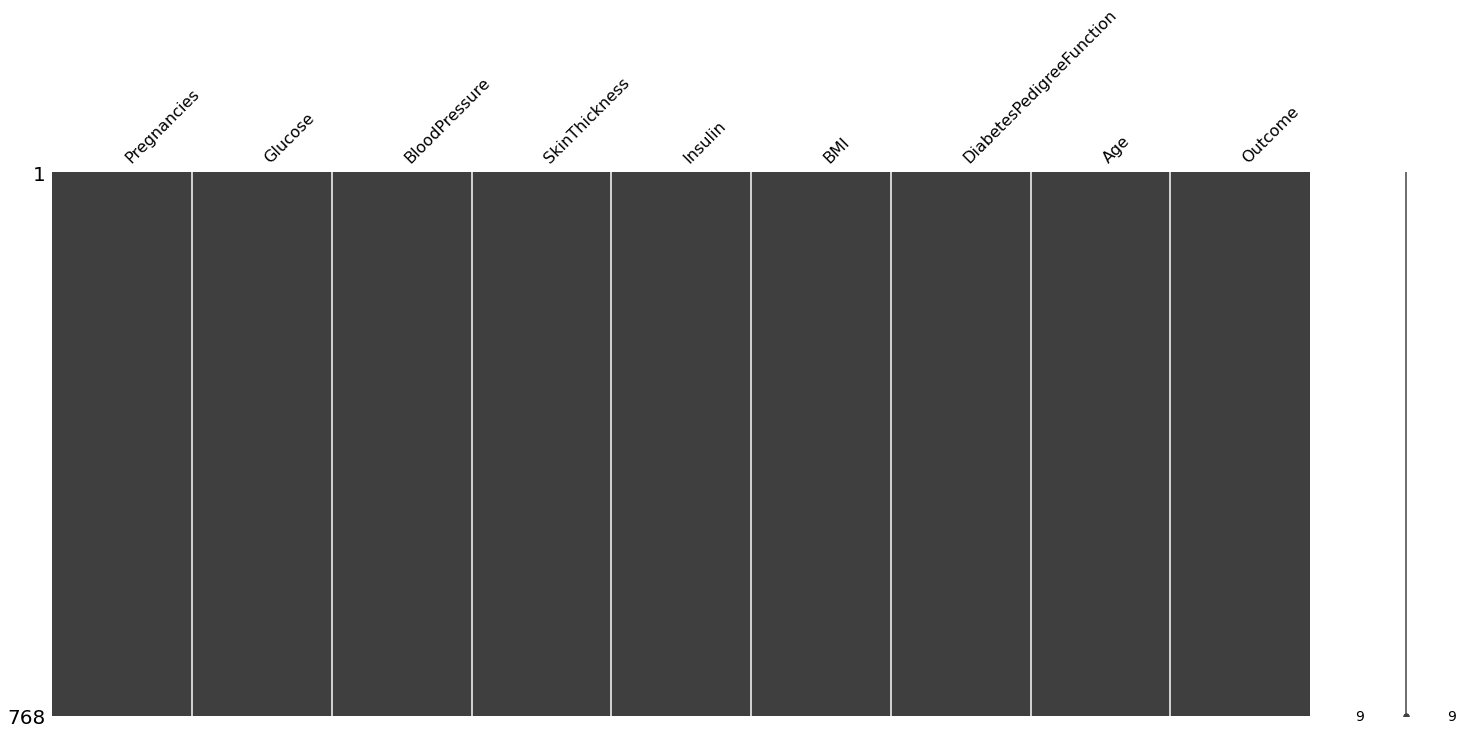

In [6]:
msno.matrix(df)

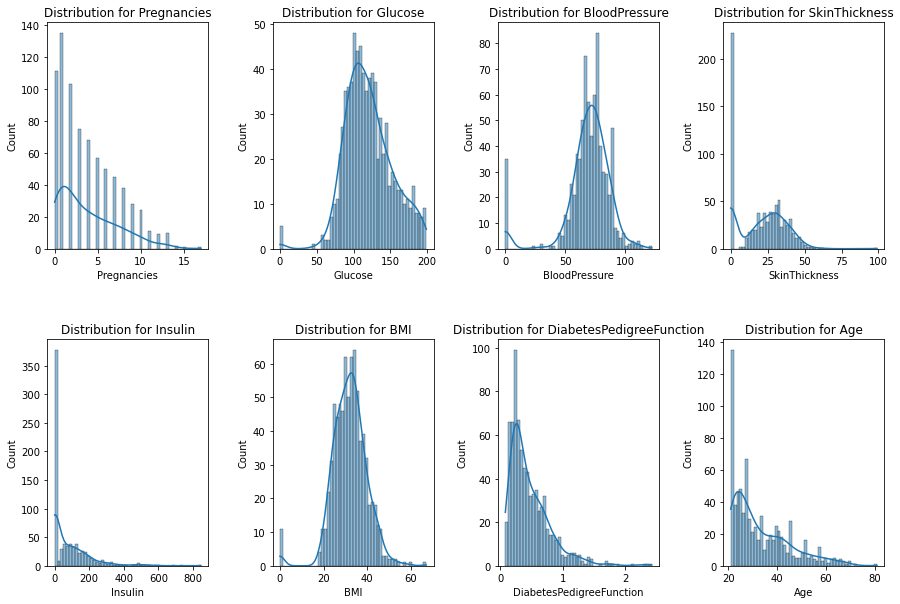

In [7]:
def check_distribution_dist(df, features):
    """
    Plots the distribution of numerical features in a dataframe using histograms and kernel density estimation.

    Parameters:
    -----------
    df: pandas DataFrame
        The dataframe containing the data.
    features: list
        The list of numerical feature column names.

    Returns:
    --------
    None(displays subplots and distribution)

    """

    num_features = len(features)
    fig, axs = plt.subplots(nrows=2, ncols=num_features//2, figsize=(15,10))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    axs = axs.ravel()
    for i, feature in enumerate(features):
        sns.histplot(data=df, x=feature, ax=axs[i], kde=True, palette="magma", bins=50)
        axs[i].set(title=f"Distribution for {feature}")
    plt.show()


check_distribution_dist(df,features)

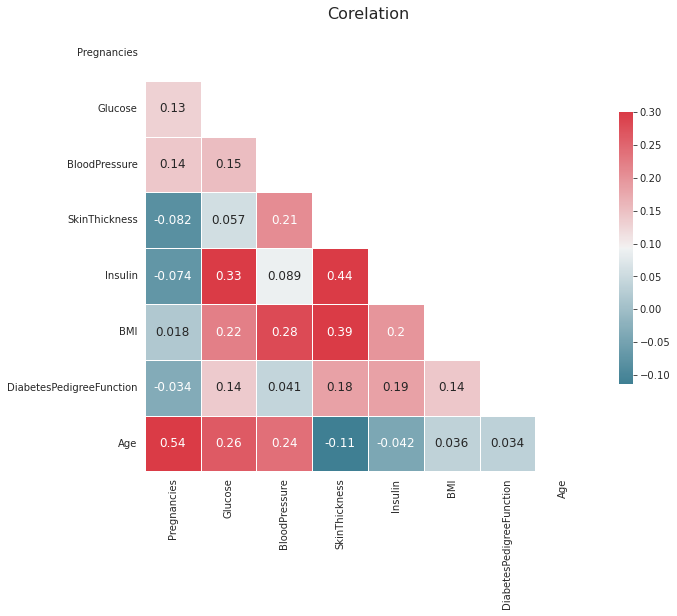

Corelation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.0

In [8]:
def plot_heatmap(data, feature_list):
    """
    Plots heatmap of correlation matrix for given features in a pandas DataFrame.

    Args:
    - data: pandas DataFrame containing the data to be analyzed
    - feature_list: list of features to be included in the correlation matrix and heatmap

    Returns:
    - None (displays heatmap and prints correlation matrix)
    """

    corr_matrix = data[feature_list].corr()
    mask = np.zeros_like(corr_matrix)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 10))
        sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 12})
        plt.title('Corelation', fontsize=16)
    plt.show()

    print("Corelation Matrix:")
    print(corr_matrix)

plot_heatmap(df, features)

In [9]:
zero_counts = df.eq(0).sum()
zero_counts_df = pd.DataFrame(zero_counts, columns=["Zero_Count"])
zero_counts_df.index.name = "column_name"
print(zero_counts_df)


                          Zero_Count
column_name                         
Pregnancies                      111
Glucose                            5
BloodPressure                     35
SkinThickness                    227
Insulin                          374
BMI                               11
DiabetesPedigreeFunction           0
Age                                0
Outcome                          500


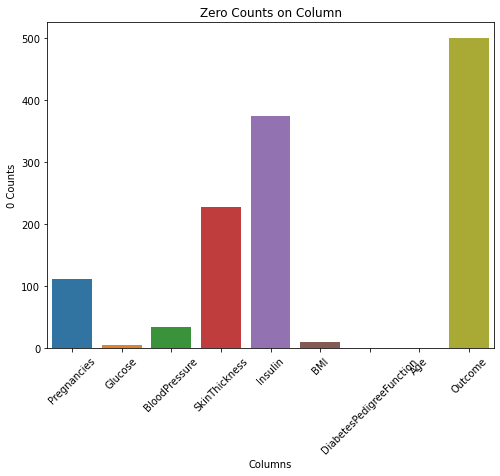

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x=zero_counts_df.index, y="Zero_Count", data=zero_counts_df)
plt.title("Zero Counts on Column")
plt.xlabel("Columns")
plt.ylabel("0 Counts")
plt.xticks(rotation=45)
plt.show()

In [11]:
#sweet_report = sv.analyze(df,target_feat="Outcome")
#sweet_report.show_html('sweetviz_report.html')

Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)


scaler = StandardScaler()
X= scaler.fit_transform(X)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")


XGBOOST

In [15]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [16]:
def calculate_performance_scores(xgb_model, X_test, y_test):
    """
    This function calculates and returns the performance scores for an selected model.

    Parameters:
    xgb_model: XGBoost model object (Can be select)
    X_test: Test dataset feature values as a pandas DataFrame
    y_test: Test dataset target values as a pandas DataFrame

    Returns:
    A list containing the following performance scores in the order specified: accuracy, precision, recall, F1 score, AUC score.
    """
    y_pred = xgb_model.predict(X_test)
    acc = np.round(accuracy_score(y_test, y_pred),2)
    pre = np.round(precision_score(y_test, y_pred),2)
    rec= np.round(recall_score(y_test, y_pred),2)
    f1= np.round(f1_score(y_test, y_pred),2)
    auc= np.round(roc_auc_score(y_test, y_pred),2)
    
    performance_scores = [acc, pre, rec ,f1, auc]
 
    return performance_scores

xgb_model_performance = calculate_performance_scores(xgb_model, X_test, y_test)
print('XGBOOST: ' , xgb_model_performance )



XGBOOST:  [0.82, 0.77, 0.91, 0.84, 0.82]


In [17]:
xg_boost = {'XGBOOST:': xgb_model_performance}
xg_boost_df = pd.DataFrame(xg_boost, index=['Accuracy: ', 'Precision: ', 'Recall: ', 'F1_score: ','Auc: '])
xg_boost_df

,XGBOOST:
Accuracy:,0.82
Precision:,0.77
Recall:,0.91
F1_score:,0.84
Auc:,0.82


CATBOOST


In [18]:
catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, l2_leaf_reg=3)

catboost.fit(X_train, y_train)

catboost_pred = catboost.predict(X_test)

accuracy = accuracy_score(y_test, catboost_pred)

print("Accuracy:", accuracy)

0:	learn: 0.6664680	total: 153ms	remaining: 15.1s
1:	learn: 0.6469518	total: 158ms	remaining: 7.73s
2:	learn: 0.6272314	total: 161ms	remaining: 5.19s
3:	learn: 0.6096801	total: 163ms	remaining: 3.91s
4:	learn: 0.5923865	total: 166ms	remaining: 3.15s
5:	learn: 0.5764929	total: 168ms	remaining: 2.63s
6:	learn: 0.5617935	total: 170ms	remaining: 2.26s
7:	learn: 0.5502490	total: 173ms	remaining: 1.99s
8:	learn: 0.5380977	total: 175ms	remaining: 1.77s
9:	learn: 0.5278537	total: 178ms	remaining: 1.6s
10:	learn: 0.5183240	total: 182ms	remaining: 1.47s
11:	learn: 0.5093347	total: 184ms	remaining: 1.35s
12:	learn: 0.5003207	total: 187ms	remaining: 1.25s
13:	learn: 0.4917955	total: 189ms	remaining: 1.16s
14:	learn: 0.4854229	total: 191ms	remaining: 1.08s
15:	learn: 0.4794215	total: 193ms	remaining: 1.01s
16:	learn: 0.4733731	total: 198ms	remaining: 967ms
17:	learn: 0.4670908	total: 201ms	remaining: 916ms
18:	learn: 0.4611973	total: 204ms	remaining: 869ms
19:	learn: 0.4565199	total: 206ms	remainin

In [19]:
catboost_score = calculate_performance_scores(catboost, X_test, y_test)
print('Catboost Score: ' , catboost_score )

catboost_score= {'Catboost Score': catboost_score,
                }
catboost_score_df = pd.DataFrame(catboost_score, index=['Accuracy: ', 'Precision: ', 'Recall: ', 'F1_score: ','Auc: '])
catboost_score_df 

Catboost Score:  [0.8, 0.77, 0.84, 0.81, 0.79]


,Catboost Score
Accuracy:,0.80
Precision:,0.77
Recall:,0.84
F1_score:,0.81
Auc:,0.79


LGBM - GridSearch


In [20]:
lgbm = lgb.LGBMClassifier()


param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 4],
    'n_estimators': [50, 100],
    'num_leaves': [10, 20],
   
}

grid_search = GridSearchCV(lgbm, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

lgbm_best = grid_search.best_estimator_
lgbm_pred = lgbm_best.predict(X_test)
accuracy = accuracy_score(y_test, lgbm_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'num_leaves': 20}
Accuracy: 0.82


In [21]:
lgbm_score = calculate_performance_scores(lgbm_best, X_test, y_test)
print('LGBM Score: ' , lgbm_score )


lgbm_score= {'LGBM Score': lgbm_score,
                }
lgbm_score_df = pd.DataFrame(lgbm_score, index=['Accuracy: ', 'Precision: ', 'Recall: ', 'F1_score: ','Auc: '])
lgbm_score_df


LGBM Score:  [0.82, 0.78, 0.89, 0.83, 0.82]


,LGBM Score
Accuracy:,0.82
Precision:,0.78
Recall:,0.89
F1_score:,0.83
Auc:,0.82


RANDOM FOREST


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)

random_forest = calculate_performance_scores(rf, X_test, y_test)

random_forest = {'Random Forest Score': random_forest,}
random_forest_df = pd.DataFrame(random_forest, index=['Accuracy: ', 'Precision: ', 'Recall: ', 'F1_score: ','Auc: '])
random_forest_df


,Random Forest Score
Accuracy:,0.84
Precision:,0.79
Recall:,0.91
F1_score:,0.85
Auc:,0.83


Model Comparison

In [23]:
model_comparison= pd.concat([xg_boost_df, catboost_score_df,lgbm_score_df,random_forest_df ], axis=1)
model_comparison

,XGBOOST:,Catboost Score,LGBM Score,Random Forest Score
Accuracy:,0.82,0.80,0.82,0.84
Precision:,0.77,0.77,0.78,0.79
Recall:,0.91,0.84,0.89,0.91
F1_score:,0.84,0.81,0.83,0.85
Auc:,0.82,0.79,0.82,0.83


Pickle

In [24]:
import pickle
with open('randomforest.pkl', 'wb') as f:
    pickle.dump(rf, f)